## Análisis de Clientes de un Proveedor de Internet

### El cliente es una Cooperativa que provee servicios de Internet por Fibra Optica, ADSL e Inalámbrico, Telefonía tradicional por cobre y telefonía IP y servicio de TV por Internet.

### La idea es realizar algunos estadísticos a partir de datos de los clientes exportados a un Excel desde el SQL Server del sistema de gestión de la compañía

### Como final se quiere realizar un Clustering para segmentar a los clientes

### Importamos Pandas, Numpy, matplotlib y Seaborn

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

### Cargamos los datasets desde un Excel exportado del ERP de la compañía. Cada dataset está en una hoja del Excel

In [91]:
clientes_internet = pd.read_excel("clientes.xlsx",sheet_name='internet')
clientes_telefonia = pd.read_excel("clientes.xlsx",sheet_name='telefonia')
clientes_tv = pd.read_excel("clientes.xlsx",sheet_name='TV')
clientes_facturacion = pd.read_excel("clientes.xlsx",sheet_name='FC')
clientes_saldos = pd.read_excel("clientes.xlsx",sheet_name='saldos')
clientes_socios = pd.read_excel("clientes.xlsx",sheet_name='socios')

### Condición de Socio / No Socio de la Cooperativs: un cliente puede estar asociado o no

### Saldos: contiene el estado de Cuenta Corriente de los clientes. Saldo actual, saldo a 30 dias y saldo a 60 dias

In [92]:
clientes_socios

,numeroCliente,socio
0,2,N
1,6,N
2,8,N
3,9,N
4,10,N
...,...,...
27457,30628,S
27458,30629,S
27459,30630,S
27460,30631,S


In [93]:
clientes_socios.dtypes

numeroCliente     int64
socio            object
dtype: object

In [94]:
clientes_socios['socio'] = clientes_socios['socio'].astype('category')

In [95]:
clientes_socios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27462 entries, 0 to 27461
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   numeroCliente  27462 non-null  int64   
 1   socio          27462 non-null  category
dtypes: category(1), int64(1)
memory usage: 241.6 KB


In [3]:
clientes_saldos.dtypes

numeroCliente          int64
valor                float64
Saldo30Dias_valor    float64
Saldo60Dias_valor    float64
dtype: object

In [4]:
clientes_saldos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31881 entries, 0 to 31880
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   numeroCliente      31881 non-null  int64  
 1   valor              31881 non-null  float64
 2   Saldo30Dias_valor  31881 non-null  float64
 3   Saldo60Dias_valor  31881 non-null  float64
dtypes: float64(3), int64(1)
memory usage: 996.4 KB


### Facturación: total facturado por cliente últimas 3 facturaciones (Junio/Mayo/Abril 2024)

In [5]:
clientes_facturacion.dtypes

numerocliente      int64
fc_junio         float64
fc_mayo          float64
fc_abril         float64
dtype: object

In [6]:
clientes_facturacion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16457 entries, 0 to 16456
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   numerocliente  16457 non-null  int64  
 1   fc_junio       16154 non-null  float64
 2   fc_mayo        16163 non-null  float64
 3   fc_abril       16106 non-null  float64
dtypes: float64(3), int64(1)
memory usage: 514.4 KB


In [7]:
# renombro columna numerocliente por numeroCliente para mantener consistencia de nombres
clientes_facturacion.rename(columns={'numerocliente': 'numeroCliente'},inplace=True)

### Internet: cantidad de servicios de Internet por cliente y por tipo de servicio (ADSL, Fibra Optica, Inalámbrico)

In [8]:
clientes_internet.dtypes

numerocliente      int64
int_fibra        float64
int_adsl         float64
int_aire         float64
dtype: object

In [9]:
# renombro columna para consistencia de nombres
clientes_facturacion.rename(columns={'numerocliente': 'numeroCliente'},inplace=True)

In [10]:
clientes_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15922 entries, 0 to 15921
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   numerocliente  15922 non-null  int64  
 1   int_fibra      10390 non-null  float64
 2   int_adsl       4765 non-null   float64
 3   int_aire       1707 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 497.7 KB


In [11]:
# Renombro la columna numerocliente por numeroCliente para mantener consistencia de nombres con los otros
clientes_internet.rename(columns={'numerocliente': 'numeroCliente'}, inplace=True)

In [12]:
# Convierto en este caso los float64 en int64 porque con cantidades enteras.
clientes_internet['int_adsl'] = clientes_internet['int_adsl'].astype('Int64')
clientes_internet['int_fibra'] = clientes_internet['int_fibra'].astype('Int64')
clientes_internet['int_aire'] = clientes_internet['int_aire'].astype('Int64')

In [13]:
# Todos los clientes tienen al menos 1 servicio de algún tipo. Al extraer los datos se filtraron clientes sin Internet
# Se imputa CERO a los NA porque los datos vienen de un COUNT() y el NULL implica que no tiene de ese tipo de servicio por lo cual equivale a cantidad CERO

clientes_internet['int_adsl'] = clientes_internet['int_adsl'].fillna(0)
clientes_internet['int_fibra'] = clientes_internet['int_fibra'].fillna(0)
clientes_internet['int_aire'] = clientes_internet['int_aire'].fillna(0)

### Telefonía: cantidad de servicios de Telefonía por cliente y por tipo de servicio (Cobre/VoIP)

In [14]:
clientes_telefonia.dtypes

numerocliente      int64
tel_cobre        float64
tel_voip         float64
dtype: object

In [15]:
# Renombro la columna numerocliente por numeroCliente para mantener consistencia de nombres con los otros
clientes_telefonia.rename(columns={'numerocliente': 'numeroCliente'}, inplace=True)

In [16]:
clientes_telefonia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6918 entries, 0 to 6917
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   numeroCliente  6918 non-null   int64  
 1   tel_cobre      4083 non-null   float64
 2   tel_voip       3283 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 162.3 KB


In [17]:
# Convierto en este caso los float64 en int64 porque con cantidades enteras.
clientes_telefonia['tel_cobre'] = clientes_telefonia['tel_cobre'].astype('Int64')
clientes_telefonia['tel_voip'] = clientes_telefonia['tel_voip'].astype('Int64')

In [18]:
# Todos los clientes tienen al menos 1 servicio de algún tipo. Al extraer los datos se filtraron clientes sin Internet
# Se imputa CERO a los NA porque los datos vienen de un COUNT() y el NULL implica que no tiene de ese tipo de servicio por lo cual equivale a cantidad CERO

clientes_telefonia['tel_cobre'] = clientes_telefonia['tel_cobre'].fillna(0)
clientes_telefonia['tel_voip'] = clientes_telefonia['tel_voip'].fillna(0)

### Televisión: cantidad de clientes con servicio de TV por Internet

In [19]:
clientes_tv.dtypes

tv               int64
numeroCliente    int64
dtype: object

In [20]:
clientes_tv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3159 entries, 0 to 3158
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   tv             3159 non-null   int64
 1   numeroCliente  3159 non-null   int64
dtypes: int64(2)
memory usage: 49.5 KB


### Clientes de Internet: 15922
### Clientes Telefonía: 6918
### Clientes TV: 3159
### Datos de Cuenta Corriente: 31881 clientes
### Datos de Facturación: 16457 clientes

In [21]:
# Comenzamos mergeando los 3 datasets de servicios (Internet/Telefonía/TV) porque esos me definen el universo de los clientes sobre los que me quiero enfocar
# Puedo tener datos de Cuenta Corriente de clientes sin servicios (pocos) y datos de Facturación de clientes sin servicios 
## (el dataset me trae todos los clientes hayan facturado o no, en ese caso traerá CERO en cada periíodo de facturación)

In [22]:
clientes_servicios = clientes_internet.merge(clientes_telefonia,on='numeroCliente',how='outer')

In [23]:
clientes_servicios

,numeroCliente,int_fibra,int_adsl,int_aire,tel_cobre,tel_voip
0,2,1,0,0,0,1
1,6,3,2,0,3,3
2,9,1,1,0,1,1
3,11,1,0,0,0,1
4,13,4,1,4,1,4
...,...,...,...,...,...,...
16240,28907,<NA>,<NA>,<NA>,1,0
16241,29989,<NA>,<NA>,<NA>,1,0
16242,30130,<NA>,<NA>,<NA>,1,0
16243,30209,<NA>,<NA>,<NA>,1,0


In [24]:
clientes_servicios = clientes_servicios.merge(clientes_tv,on='numeroCliente',how='outer')

In [25]:
clientes = clientes_facturacion.merge(clientes_servicios,on='numeroCliente',how='outer')

In [26]:
clientes

,numeroCliente,fc_junio,fc_mayo,fc_abril,int_fibra,int_adsl,int_aire,tel_cobre,tel_voip,tv
0,2,29662.75,28144.66,25221.18,1,0,0,0,1,NaN
1,6,153824.27,152840.05,114976.81,3,2,0,3,3,NaN
2,8,NaN,26073.23,24241.48,<NA>,<NA>,<NA>,<NA>,<NA>,NaN
3,9,39272.92,37286.82,39207.67,1,1,0,1,1,NaN
4,11,49985.66,47561.13,42892.05,1,0,0,0,1,NaN
...,...,...,...,...,...,...,...,...,...,...
16615,30630,NaN,NaN,NaN,1,0,0,<NA>,<NA>,NaN
16616,30631,NaN,NaN,NaN,1,0,0,<NA>,<NA>,NaN
16617,30632,NaN,NaN,NaN,1,0,0,<NA>,<NA>,NaN
16618,5941,NaN,NaN,NaN,<NA>,<NA>,<NA>,0,2,NaN


In [27]:
# nuevamente imputo CERO a los NA en la cantidad de servicios porque en elmerge puede traer clientes que tienen un grupo de servicios pero no el otro (vienen del dataset de Telefonía pero no están en el de Internet por ejemplo por lo cual suma registro pero con NA)

clientes['int_fibra'] = clientes['int_fibra'].fillna(0)
clientes['int_aire'] = clientes['int_aire'].fillna(0)
clientes['int_adsl'] = clientes['int_adsl'].fillna(0)
clientes['tel_cobre'] = clientes['tel_cobre'].fillna(0)
clientes['tel_voip'] = clientes['tel_voip'].fillna(0)
clientes['tv'] = clientes['tv'].fillna(0)

In [28]:
clientes

,numeroCliente,fc_junio,fc_mayo,fc_abril,int_fibra,int_adsl,int_aire,tel_cobre,tel_voip,tv
0,2,29662.75,28144.66,25221.18,1,0,0,0,1,0.0
1,6,153824.27,152840.05,114976.81,3,2,0,3,3,0.0
2,8,NaN,26073.23,24241.48,0,0,0,0,0,0.0
3,9,39272.92,37286.82,39207.67,1,1,0,1,1,0.0
4,11,49985.66,47561.13,42892.05,1,0,0,0,1,0.0
...,...,...,...,...,...,...,...,...,...,...
16615,30630,NaN,NaN,NaN,1,0,0,0,0,0.0
16616,30631,NaN,NaN,NaN,1,0,0,0,0,0.0
16617,30632,NaN,NaN,NaN,1,0,0,0,0,0.0
16618,5941,NaN,NaN,NaN,0,0,0,0,2,0.0


In [29]:
clientes.dtypes

numeroCliente      int64
fc_junio         float64
fc_mayo          float64
fc_abril         float64
int_fibra          Int64
int_adsl           Int64
int_aire           Int64
tel_cobre          Int64
tel_voip           Int64
tv               float64
dtype: object

In [30]:
# campo TV convierto e Int64 ya que es cantidad
clientes['tv'] = clientes['tv'].astype('Int64')

In [31]:
# mergeo con el dataset de Saldos de Cuenta Corriente (Deuda) y lo hago con inner porque sólo me interesan los clientes del dataset que contienen al menos 1 servicio
# puede haber (de hecho hay) clientes con Saldo pero sin servicio (deudores incobrables, clientes de baja, clientes con otro tipo de servicio)

clientes = clientes.merge(clientes_saldos,on='numeroCliente',how='inner')

In [32]:
clientes

,numeroCliente,fc_junio,fc_mayo,fc_abril,int_fibra,int_adsl,int_aire,tel_cobre,tel_voip,tv,valor,Saldo30Dias_valor,Saldo60Dias_valor
0,2,29662.75,28144.66,25221.18,1,0,0,0,1,0,29662.75,0.00,0.0
1,6,153824.27,152840.05,114976.81,3,2,0,3,3,0,306664.32,152840.05,0.0
2,8,NaN,26073.23,24241.48,0,0,0,0,0,0,0.00,0.00,0.0
3,9,39272.92,37286.82,39207.67,1,1,0,1,1,0,39272.92,0.00,0.0
4,11,49985.66,47561.13,42892.05,1,0,0,0,1,0,0.00,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17189,30630,NaN,NaN,NaN,1,0,0,0,0,0,0.00,0.00,0.0
17190,30631,NaN,NaN,NaN,1,0,0,0,0,0,0.00,0.00,0.0
17191,30632,NaN,NaN,NaN,1,0,0,0,0,0,0.00,0.00,0.0
17192,5941,NaN,NaN,NaN,0,0,0,0,2,0,0.00,0.00,0.0


In [96]:
clientes = clientes.merge(clientes_socios,on='numeroCliente',how='inner')

In [97]:
clientes

,numeroCliente,fc_junio,fc_mayo,fc_abril,int_fibra,int_adsl,int_aire,tel_cobre,tel_voip,tv,valor,Saldo30Dias_valor,Saldo60Dias_valor,socio
0,2,29662.75,28144.66,25221.18,1,0,0,0,1,0,29662.75,0.00,0.0,N
1,6,153824.27,152840.05,114976.81,3,2,0,3,3,0,306664.32,152840.05,0.0,N
2,8,NaN,26073.23,24241.48,0,0,0,0,0,0,0.00,0.00,0.0,N
3,9,39272.92,37286.82,39207.67,1,1,0,1,1,0,39272.92,0.00,0.0,N
4,11,49985.66,47561.13,42892.05,1,0,0,0,1,0,0.00,0.00,0.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17188,30630,NaN,NaN,NaN,1,0,0,0,0,0,0.00,0.00,0.0,S
17189,30631,NaN,NaN,NaN,1,0,0,0,0,0,0.00,0.00,0.0,S
17190,30632,NaN,NaN,NaN,1,0,0,0,0,0,0.00,0.00,0.0,S
17191,5941,NaN,NaN,NaN,0,0,0,0,2,0,0.00,0.00,0.0,S


In [98]:
# los clientes sin facturación en los períodos considerados los borro (puede que sean clientes nuevos vendidos en Junio que todavía no facturaron, facturarán en Julio)
# los clientes con cantidad 0 en TODOS sus servicios los borro, no me interesan para el análisis
# no deberían quedar valores NA

clientes_final = clientes[ ~(np.isnan(clientes['fc_junio']) | np.isnan(clientes['fc_mayo']) | np.isnan(clientes['fc_abril'])) ]

In [99]:
clientes_final

,numeroCliente,fc_junio,fc_mayo,fc_abril,int_fibra,int_adsl,int_aire,tel_cobre,tel_voip,tv,valor,Saldo30Dias_valor,Saldo60Dias_valor,socio
0,2,29662.75,28144.66,25221.18,1,0,0,0,1,0,29662.75,0.00,0.0,N
1,6,153824.27,152840.05,114976.81,3,2,0,3,3,0,306664.32,152840.05,0.0,N
3,9,39272.92,37286.82,39207.67,1,1,0,1,1,0,39272.92,0.00,0.0,N
4,11,49985.66,47561.13,42892.05,1,0,0,0,1,0,0.00,0.00,0.0,N
5,13,304930.32,289098.44,260638.81,4,1,4,1,4,0,304930.32,0.00,0.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16778,30286,43913.86,59847.97,16442.90,1,0,0,0,0,0,43913.86,0.00,0.0,S
16781,30289,28646.68,27169.55,31535.92,1,0,0,0,0,0,28646.68,0.00,0.0,S
16782,30290,28646.68,27169.55,18073.02,1,0,0,0,0,0,28646.68,0.00,0.0,S
16787,30296,48013.03,45547.38,40616.13,1,0,0,0,0,0,48013.03,0.00,0.0,S


In [100]:
# borro clientes con CERO cantidad en TODOS sus servicios
clientes_final = clientes_final[ ~((clientes_final['int_adsl'] == 0) & (clientes_final['int_aire'] == 0) & (clientes_final['int_fibra'] == 0) & (clientes_final['tel_cobre'] == 0) & (clientes_final['tel_voip'] == 0) & (clientes_final['tv'] == 0)) ]

In [101]:
# renombro algunas columnas
clientes_final.rename(columns={'valor': 'Saldo','Saldo30Dias_valor': 'Saldo30Dias','Saldo60Dias_valor': 'Saldo60Dias'},inplace=True)

<ipython-input-101-9b1c5267a049>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clientes_final.rename(columns={'valor': 'Saldo','Saldo30Dias_valor': 'Saldo30Dias','Saldo60Dias_valor': 'Saldo60Dias'},inplace=True)


In [102]:
clientes_final

,numeroCliente,fc_junio,fc_mayo,fc_abril,int_fibra,int_adsl,int_aire,tel_cobre,tel_voip,tv,Saldo,Saldo30Dias,Saldo60Dias,socio
0,2,29662.75,28144.66,25221.18,1,0,0,0,1,0,29662.75,0.00,0.0,N
1,6,153824.27,152840.05,114976.81,3,2,0,3,3,0,306664.32,152840.05,0.0,N
3,9,39272.92,37286.82,39207.67,1,1,0,1,1,0,39272.92,0.00,0.0,N
4,11,49985.66,47561.13,42892.05,1,0,0,0,1,0,0.00,0.00,0.0,N
5,13,304930.32,289098.44,260638.81,4,1,4,1,4,0,304930.32,0.00,0.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16778,30286,43913.86,59847.97,16442.90,1,0,0,0,0,0,43913.86,0.00,0.0,S
16781,30289,28646.68,27169.55,31535.92,1,0,0,0,0,0,28646.68,0.00,0.0,S
16782,30290,28646.68,27169.55,18073.02,1,0,0,0,0,0,28646.68,0.00,0.0,S
16787,30296,48013.03,45547.38,40616.13,1,0,0,0,0,0,48013.03,0.00,0.0,S


## Algunos gráficos exploratorios

## Primer gráfico: evolución de la facturación entre los tres períodos analizados

In [103]:
# Para eso me armo un dataset específico con un sum() de la facturación de cada período y le agrego una columna con la fecha de cierre de cada período
# Para hacerlo más escalable a nuevos períodos podría haber un dataset con el mapeo nombre de período/fecha de cierre

resumen_facturacion = clientes_final[ ['fc_abril','fc_mayo','fc_junio'] ].sum()
resumen_facturacion.index = ([0,1,2])
fechas = pd.Series(['2024-04-30','2024-05-31','2024-06-30'],index=[0,1,2])
resumen_facturacion = pd.concat([resumen_facturacion,fechas],axis=1)
resumen_facturacion.rename(columns={0:'Total facturado M$',1:'Fecha cierre'},inplace=True)
resumen_facturacion['Total facturado M$'] = resumen_facturacion['Total facturado M$'] / 1000000 # Ploteo en Millones de pesos
resumen_facturacion

,Total facturado M$,Fecha cierre
0,512.329569,2024-04-30
1,563.885543,2024-05-31
2,588.265830,2024-06-30


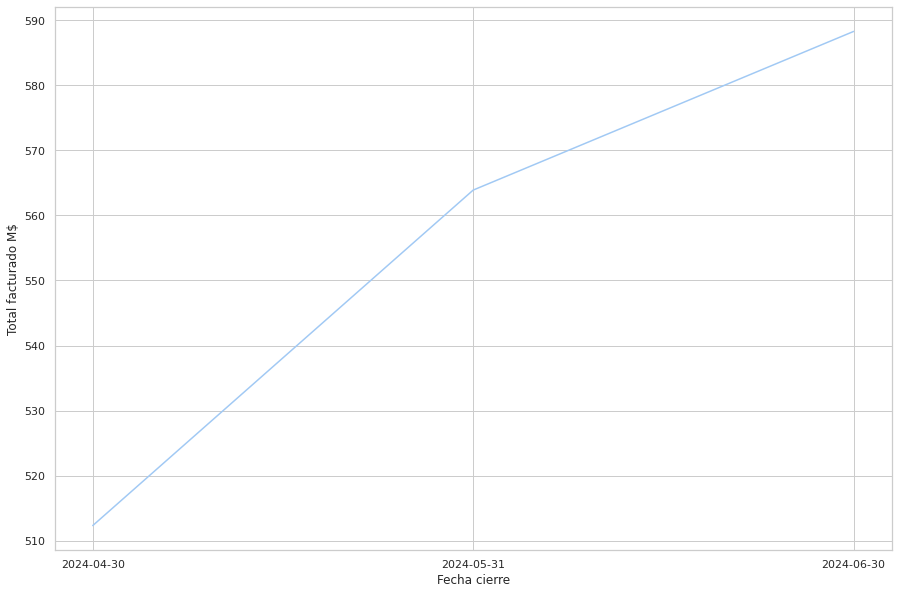

In [104]:
sns.set_theme(style="whitegrid", palette="pastel",rc={'figure.figsize':(15,10)})
_ = sns.lineplot(x="Fecha cierre", y="Total facturado M$",
             data=resumen_facturacion)

## Distribución de servicios por tipo

In [105]:
resumen_servicios = clientes_final[ ['int_adsl','int_aire','int_fibra','tel_cobre','tel_voip','tv'] ].sum()
resumen_servicios = pd.DataFrame(columns=['cantidad'],data=resumen_servicios)
resumen_servicios.rename(index={'int_adsl': 'Internet ADSL','int_aire':'Internet Wireless','int_fibra':'Internet F. Optica','tel_cobre':'Telefonía cobre','tel_voip':'Telefonía IP','tv':'Televisión por Internet'},inplace=True)

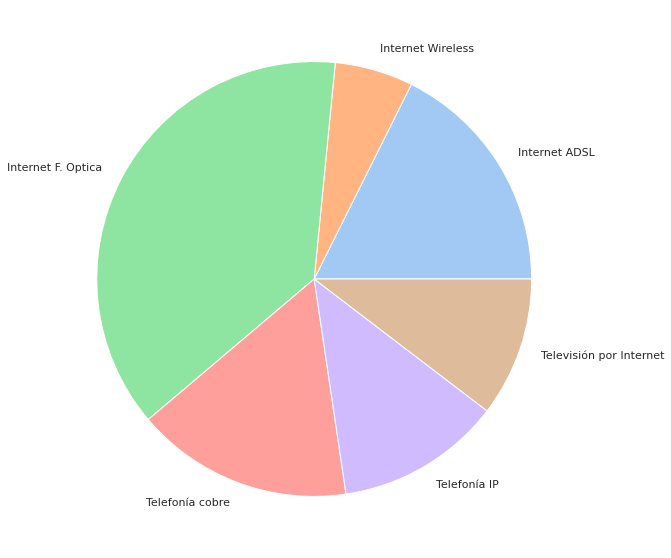

In [106]:
labels = resumen_servicios.index
cantidades = resumen_servicios['cantidad']

fig, ax = plt.subplots(figsize=(15,10))
_ = ax.pie(cantidades, labels=labels)

## Distribución de Facturación por período

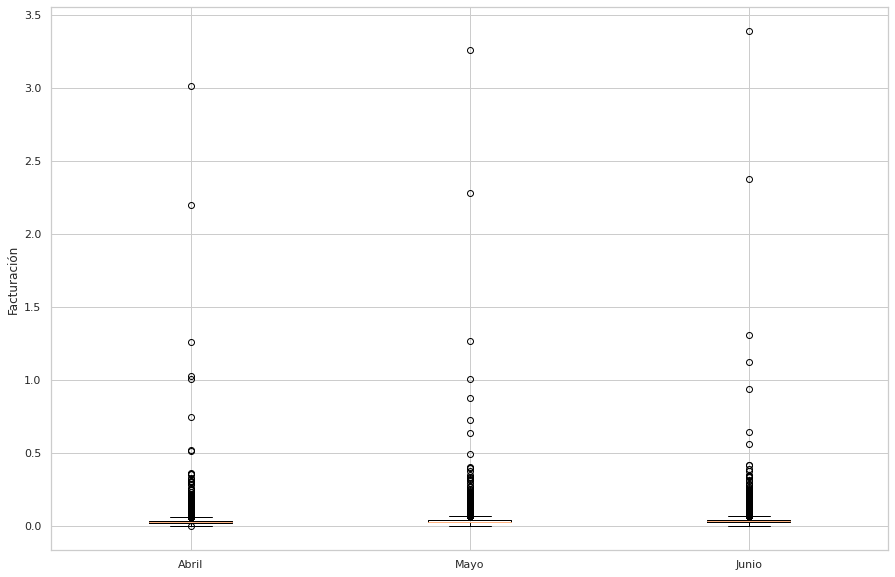

In [145]:
labels = ['Abril', 'Mayo', 'Junio']

fig, ax = plt.subplots(figsize=(15,10))
ax.set_ylabel('Facturación')

# expreso la facturación en M$
clientes_fc = clientes_final.loc[:,['fc_abril','fc_mayo','fc_junio']]
clientes_fc['fc_abril'] = clientes_fc['fc_abril'] / 1000000
clientes_fc['fc_mayo'] = clientes_fc['fc_mayo'] / 1000000
clientes_fc['fc_junio'] = clientes_fc['fc_junio'] / 1000000

bplot = ax.boxplot(clientes_fc[ ['fc_abril','fc_mayo','fc_junio']  ],
                   labels=labels)  # will be used to label x-ticks

_ = plt.show()

## Distribución de la deuda por antigüedad

In [108]:
saldos = clientes_final[ ['Saldo','Saldo30Dias','Saldo60Dias'] ].sum()
saldos = saldos / 1000000 #en millones de pesos
saldos

Saldo          453.263105
Saldo30Dias     38.931225
Saldo60Dias     18.314326
dtype: float64

In [115]:
saldos = pd.DataFrame(data=saldos,index=saldos.index)
saldos.rename(columns={0:'Total'},inplace=True)
saldos.rename(index={'Saldo':'Deuda sin vencer','Saldo30Dias':'Deuda vencida 30 dias','Saldo60Dias':'Deuda vencida 60 dias'},inplace=True)
saldos

,Total
Deuda sin vencer,453.263105
Deuda vencida 30 dias,38.931225
Deuda vencida 60 dias,18.314326


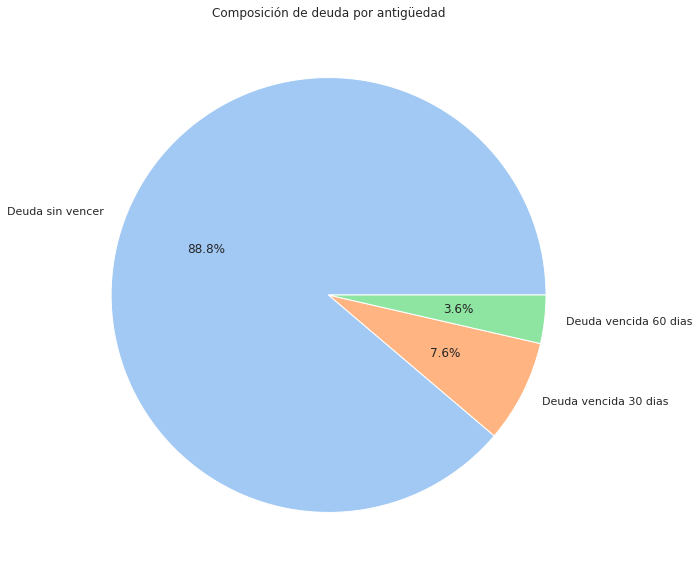

In [143]:
labels = saldos.index
totales = saldos['Total']

fig, ax = plt.subplots(figsize=(15,10))
ax.set_title('Composición de deuda por antigüedad')
wedge = ax.pie(totales, labels=labels,autopct='%1.1f%%')

## Distribución de la facturación trimestral por Socios y No Socios, en M$

In [159]:
clientes_socio_fc = clientes_final.loc[:, ['fc_abril','fc_mayo','fc_junio','socio'] ]
clientes_socio_fc['Facturación trimestre'] = (clientes_socio_fc['fc_abril'] + clientes_socio_fc['fc_mayo'] + clientes_socio_fc['fc_junio']) / 1000000
clientes_socio_fc.drop(['fc_junio','fc_mayo','fc_abril'],inplace=True,axis=1)
clientes_socio_fc['socio'] = clientes_socio_fc['socio'].apply(lambda x : 'Socio' if x == 'S' else 'No Socio')
clientes_socio_fc

,socio,Facturación trimestre
0,No Socio,0.083029
1,No Socio,0.421641
3,No Socio,0.115767
4,No Socio,0.140439
5,No Socio,0.854668
...,...,...
16778,Socio,0.120205
16781,Socio,0.087352
16782,Socio,0.073889
16787,Socio,0.134177


Text(0, 0.5, 'Condición cliente')

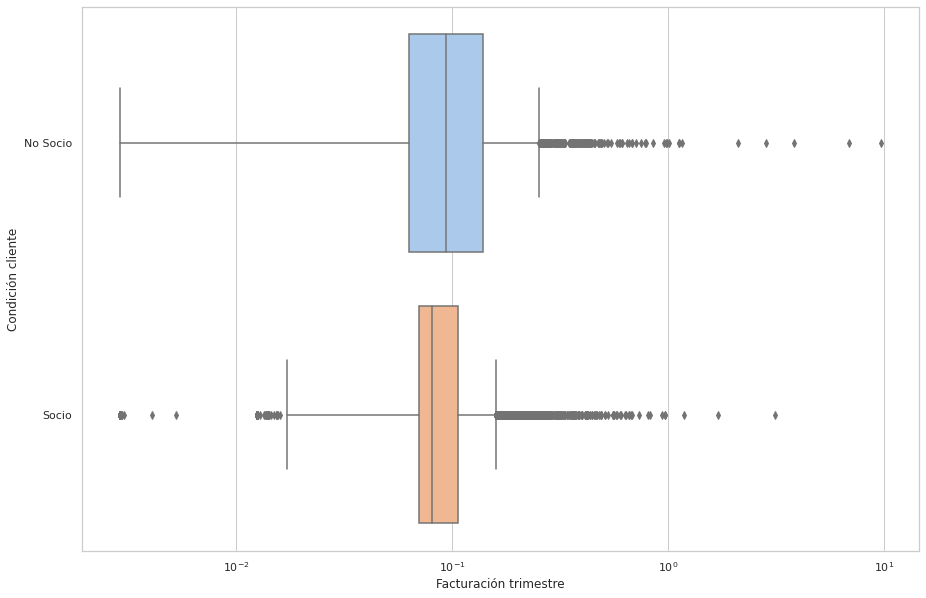

In [166]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.set_xscale("log")
_ = sns.boxplot(
    clientes_socio_fc, x='Facturación trimestre', y="socio")
ax.set_ylabel ('Condición cliente')

